# <h1 align="center"> Spiked Neural Networks</h1>

Spiked neural networks (SNN) attempt to simulate how a neuron would fire with a human brain. For a basic round down of how a human neuron fires is by taking energy though the use of $Na^+$ ion's into the cell general through dendrite in which this can come from outside stimulates such as heat, light, pressure or a variety of other sources and the other main source of energy input is from $K^+$ ion's outputed by previous neuron. Once the energy within the neuron has reach a potential thershold of about ~55mV and then it will discharge the energy down the axon onto the next neuron in the line. The mylenin sheath helps accelerate the signal down the axon by blocking exit channels in which the energy can leave and thus enable the signal to travel down axon faster.This process of stimulus input and energy dishcarge will continue to the source that is causing the stimulus is no longer present. The stronger the stimulus the faster and more often the neuron will fire and more likely the next neuron in will act upon the signal. [1]

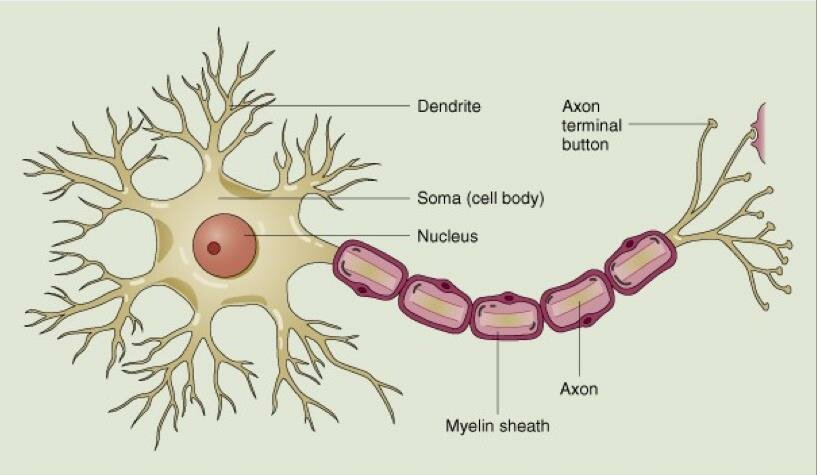

In [3]:
from IPython import display
display.Image("./neuron.jpg")

# <h1 align="center"> Maths of Spiked Neural Networks</h1>

Spiked neural networks is defined by a series of mathamatical equations which can be used to understand how the brain works with regards to neurons firing to one another. There are approximately 7 different series of mathematical equations being used to describe how people to attempt to differ and understand how the human brain works but for the course of this notebook we will focus on just the simplest one which is called Leaky Intergate and Fire (LIF) model. It can be expressed by 3 mathematical equations which attempt to define the behaviour of the neuron in terms of firing, leaky energy and discharging once it has been fired.

<h1 align="center">1. $\tau_m.dV/dt = -V(t) + I(t)$</h1>
- The following can be seen from this function:

 - $V(t)$ is the membrane potential.

 - $I(t)$ is the input current.

 - $\tau_m.dV/dt$ which indicates the change of the voltage to the membrane.

The 1st mathematical equation defines the update energy within the neuron at any particular time point. In which as seen takes the membrane potential within a neuron and any stimulus wether it should be external stimulus or other neurons. [2]

<h1 align="center">2. $V(t) = V(t) + $$-V(t)+I(t)\over{\tau_m}$$.dt$</h1>
- The following can be seen from this function:

 - $V(t)$ is the membrane potential.

 - $I(t)$ is the input current.

 - $\tau_m$ It is the time constant within the neuron.

The 2nd equation we can see the update of the membrane potential in which they take current membrane potential and add the current input over the membrane time within any time point. [2]

<h1 align="center">3. if $V(t)$ = $V_{th}$, then V(t) = $V_{reset}$</h1>
- The following can be seen from this function:

 - $V(t)$ is the membrane potential.

 - $V_{th}$ is the thershold potential requirement for the neuron to fire.

 - $V_{reset}$ is the reset requirement to V(t) back to base line. This could be seen as $V(t)-V_{th}$ to get the neuron back to base line.

Lastly the 3rd mathematical function defines the defines wether thershold for a neuron and if it has reached the neuron thershold than it should be reset and make the neuron go back to the baseline. [2]

These three equations are used to describe how SNN functions with a neural network and when combined together they describe how the energy input and membrane potential change over time, in which we can see how the energy potential changes over time within the neuron. When the first equation is divided by the time constant within the neuron and adding the membrane potential we get a updated membrane potential. The last equation used to determine when when the thershold for the neuron has been reached and once this has been reached forcefully reset the neuron back to it's baseline and within SNN torch it has two forms to reset "none", "subract" and "zero", in which "none" has no reset mechanism, "subract" will remove the thershold from the neuron membrane potential and "zero" which will reset the membrane potential back to the baseline. [2] [3]

# <h1 align="center"> Basis Simulation of Neuron</h1>

Neuron are not something that fire on a clockcycle or at set period's of time but only fire's once there is enough energy in the neuron to make a action potenial occur. This can be seen within the below example in which the sample neuron firing is set to only occur with a 5% chance at any particular time step and this compares to ANN which will occur at known time intervals. [4]

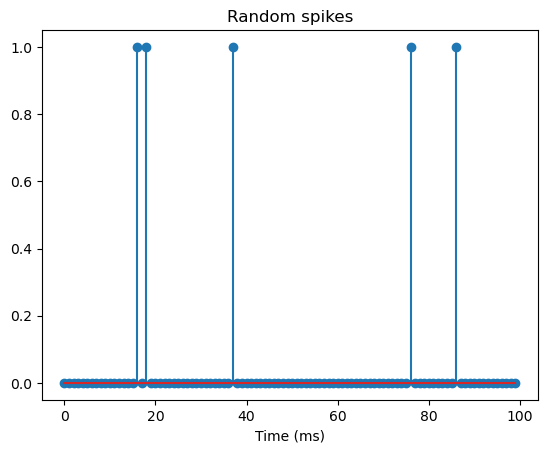

In [1]:
# Import's all nessecary for running all libraries.
import numpy as np
import matplotlib.pyplot as plt

# Generate a random spike train
T = 100 # Time points.
spike_prob = 0.05 # Probability of neuron has a spike. From current.
spikes = (np.random.rand(T,)< spike_prob) # The probability of a spike being present.

# Plot the spike train
plt.figure()
plt.stem(spikes)
plt.xlabel("Time (ms)")
plt.title("Random spikes");

# <h1 align="center"> Library Downloads</h1>

This is the downloads that will be required to run everything below.

In [2]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import surrogate

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim

import matplotlib.pyplot as plt
from IPython.display import HTML

import numpy as np
import itertools

import torchvision
import torchvision.transforms as transforms
import time

# <h1 align="center"> SNN Torch Plots</h1>

In [3]:
# Plotting Settings
def plot_cur_mem_spk(cur, mem, spk, thr_line=False, vline=False, title=False, ylim_max1=1.25, ylim_max2=1.25):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input current
  ax[0].plot(cur, c="tab:orange")
  ax[0].set_ylim([0, ylim_max1])
  ax[0].set_xlim([0, 100])
  ax[0].set_ylabel("Input Current ()")
  if title:
    ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem)
  ax[1].set_ylim([0, ylim_max2]) 
  ax[1].set_ylabel("Membrane Potential ()")
  if thr_line:
    ax[1].axhline(y=thr_line, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  plt.xlabel("Time step")

  # Plot output spike using spikeplot
  splt.raster(spk, ax[2], s=400, c="black", marker="|")
  if vline:
    ax[2].axvline(x=vline, ymin=0, ymax=6.75, alpha = 0.15, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.ylabel("Output spikes")
  plt.yticks([]) 

  plt.show()

def plot_snn_spikes(spk_in, spk1_rec, spk2_rec, title):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,7), sharex=True, 
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input spikes
  splt.raster(spk_in[:,0], ax[0], s=0.03, c="black")
  ax[0].set_ylabel("Input Spikes")
  ax[0].set_title(title)

  # Plot hidden layer spikes
  splt.raster(spk1_rec.reshape(num_steps, -1), ax[1], s = 0.05, c="black")
  ax[1].set_ylabel("Hidden Layer")

  # Plot output spikes
  splt.raster(spk2_rec.reshape(num_steps, -1), ax[2], c="black", marker="|")
  ax[2].set_ylabel("Output Spikes")
  ax[2].set_ylim([0, 10])

  plt.show()

def dvs_animator(spike_data):
  fig, ax = plt.subplots()
  anim = splt.animator((spike_data[:,0] + spike_data[:,1]), fig, ax)
  return anim

# <h1 align="center"> SNN Torch Simulation</h1>

The above code was provide to elborate and see how action potential work and neuron firing work within and as we see within the below example in which as we change the energy level throughout the 100 time steps we see how this effects the membrane potential and spike output. This can be seen with the inital energy level been set to 0 there is no effect on the membrane potential or any spike output, when we set the energy to be 0.21 we see a slow gain in the membrane potential before dropping back towards the baseline and a spike output is generated and lastly when we set the energy input to be 0.4 we see a very rapid gain in energy in which over shots the membrane thershold. Due to the rapid gain in energy the baseline for energy is never reached at 0 but at a higher level ~0.3 this can be attributed to the high level of energy attempting to enter the system and thus leading to quicker activation or spikes as there is more energy in the system to produce outputs and the decay can't slow down the energy input.

This can be then compared to a biological neuron in which the stronger the stimulus there is the more likely a neuron will fire and this can then be seen within this model in which we can set the energy level to be higher to simulate a stronger need for a action to occur.

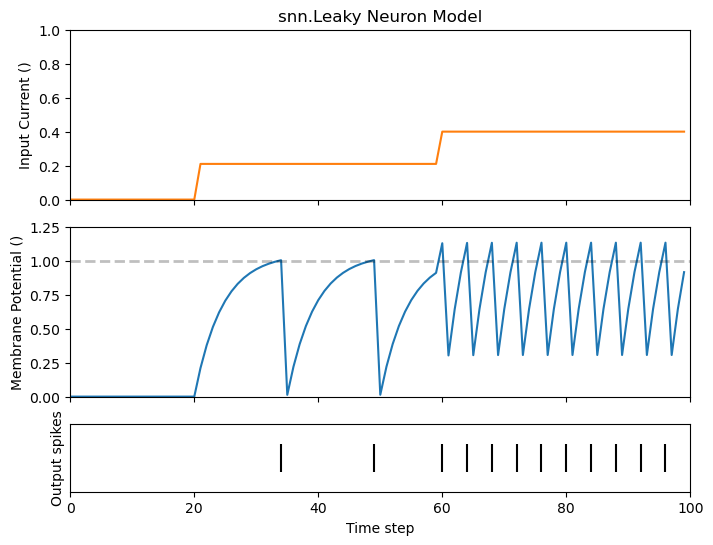

In [4]:
lif = snn.Leaky(beta=0.8, threshold = 1) # LIF neuron with a decay rate of 0.8. Minimum of 0.8 is required to get a spike to appear.

# setup inputs
num_steps = 100 # number of time-steps to simulate

x = torch.cat((torch.zeros(21), torch.ones(39)*0.21, torch.ones(40)*0.4)) # Sets first 10 times steps to 0 for input current and current input as 0.21 for the rest of the sequence.

mem = torch.zeros(1) # Set memory to 0.
spk = torch.zeros(1) # Set spike to 0.

mem_rec = [] # Makes open vector for memory.
spk_rec = [] # Make open vector for spike.

# neuron simulation
for step in range(num_steps):
  # lif neuron loop
   spk, mem = lif(x[step], mem)
   mem_rec.append(mem)
   spk_rec.append(spk)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_cur_mem_spk(x, mem_rec, spk_rec, thr_line=1, ylim_max1=1.0, title="snn.Leaky Neuron Model")

# <h1 align="center"> SNN Torch Mathematics</h1>

SNN leaky is a function within the snntorch package which is a LIF neuron model in which the following is defined as a mathematical function:

<h1 align="center">4. $U[t+1] = \beta U[t] + I_{in}[t+1] - RU_{thr}$</h1>

<h1 align="center">5. $U[t+1] = \beta U[t] + I_{syn}[t+1] - R(\beta U[t] + I_{in}[t+1])$</h1>

$U[t+1]$/$V(t+1)$: This is the membrane potential at the next time point.

$\beta$: which is the system membrane potential decay rate and this is the only requirement of the function in which it must be defined between 0 and 1. This adjust how fast the neuron reduces the energy potential towards it's baseline.

$U_{thr}$/$V_{th}$: This is the membrane threshold of neuron.

$U$/$V(t)$: This is the membrane potential of the neuron at any particular time point.

$I_{in}$/$I(t)$: This is the input current for this neuron at any particular time point.

$R$/$V_{reset}$: This is mechanism in which enable the function decay back below the thershold. There are two forms to this in which it is active by 1 and 0. When it is active 1 it subtracts the threshold from the neuron to bring the spike below thershold and when it is set to 0 it forcefully make the neuron go back to the baseline whenever the thershold is reached.


For 4 and 5 show two different functions in which they show the difference's between the if reset function is in it's active state or not. Function 4 is when is set to 1 within the function this goes by the option as "$subtract$" and when it is set to 0 as seen in function 5 this goes by "$zero$". [5]

<h1 align="center">4. $V[t+1] = \beta V[t] + I_{t}[t+1] - V_{reset}*V_{thr}$</h1>

<h1 align="center">5. $V[t+1] = \beta V[t] + I_{t}[t+1] - V_{reset}(\beta V[t] + I_{t}[t+1])$</h1>

These adjusting the maths functions 4 and 5 to match the same format as the function appear within 1, 2 and 3.

## <h1 align="center">Spiked Neural Network Model</h1>

When a Linear Intergrate and Fire SNN model is written out into a equation which can be out a differential equation can be seen as the following:

<h1 align="center"> dV = $-V_{lif}[i-1]+(R_m*I[i-1])/g_{leak} \over{ \tau}$</h1>

This shows how the model should play out in every neuron within the network in which the following is seen:

$dV$: Is the change in the membrane potential at any given time point.

$V_{lif}[i]$: Is the membrane potential at any given time point but in this equation it is shown to be at the previous time step to indicate at the last time step.

$R_m$: Is the membrane resistance.

$I[i-1]$: Is the membrane input at the current time step.

$g_{leak}$: Is the leak conductance. This can be seen as the beta decay of the neuron.

$\tau$: This is the membrane time constant.

For this spiked neural network model we will be using a feed forward neural network to determine how effectively SNN models work at analysising digital images and this will be accomplised through the use of MNIST, CIFAR10 and CIFAR100 datasets. To do this we are going to use a batch size of 128 and transform the data into 28*28 sized image in we everything is greyscaled and normalised with the data beening between 0 and 1 to analysis the images.

In [ ]:
# dataloader arguments
batch_size = 128 # Sets batch size.
data_path='/data/' # Download loaction for data if you don't already have it. Or set to where it is downloaded

dtype = torch.float
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu") # Sets to run off gpu by default or run off cpu if none is avaliable.

# Define a transform
transform = transforms.Compose([transforms.Resize((28, 28)), transforms.Grayscale(),
            transforms.ToTensor(), transforms.Normalize((0,), (1,))]) # Sets the image to greyscale, rescales array to a 28*28,
# in size, coverts them to tensor and brings all values between 0 and 1.

# Download data and make test/train split

In [8]:
# Data set download.
mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(data_path, train=False, download=True, transform=transform)
CIFAR_10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
CIFAR_10_test = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)
CIFAR_100_train = datasets.CIFAR100(data_path, train=True, download=True, transform=transform)
CIFAR_100_test = datasets.CIFAR100(data_path, train=False, download=True, transform=transform)

# Train/test split.
MNIST_train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
MNIST_test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=True, drop_last=True)
CIFAR_10_train_loader = DataLoader(CIFAR_10_train, batch_size=batch_size, shuffle=True, drop_last=True)
CIFAR_10_test_loader = DataLoader(CIFAR_10_test, batch_size=batch_size, shuffle=True, drop_last=True)
CIFAR_100_train_loader = DataLoader(CIFAR_100_train, batch_size=batch_size, shuffle=True, drop_last=True)
CIFAR_100_test_loader = DataLoader(CIFAR_100_test, batch_size=batch_size, shuffle=True, drop_last=True)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


# SNN Model and Parameters

In [9]:
# Define Network
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize layers
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.fc2 = nn.Linear(num_hidden, num_outputs)
        self.lif1 = snn.Leaky(beta=beta)
        self.lif2 = snn.Leaky(beta=beta)

    def forward(self, x):

        # Initialize hidden states at t=0
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        
        # Record the final layer
        spk2_rec = []
        mem2_rec = []

        # time-loop
        for step in range(num_steps):
          cur1 = self.fc1(x.flatten(1))
          spk1, mem1 = self.lif1(cur1, mem1)
          cur2 = self.fc2(spk1)
          spk2, mem2 = self.lif2(cur2, mem2)
          
          # store in list
          spk2_rec.append(spk2)
          mem2_rec.append(mem2)

        return torch.stack(spk2_rec, dim=0), torch.stack(mem2_rec, dim=0)

In [10]:
def measure_accuracy(model, dataloader):
  with torch.no_grad():
    model.eval()
    running_length = 0
    running_accuracy = 0

    for data, targets in iter(dataloader):
      data = data.to(device)
      targets = targets.to(device)

      # forward-pass
      spk_rec, _ = model(data)
      spike_count = spk_rec.sum(0) # batch x num_outputs
      _, max_spike = spike_count.max(1)

      # correct classes for one batch
      num_correct = (max_spike == targets).sum()

      # total accuracy
      running_length += len(targets)
      running_accuracy += num_correct
    
    accuracy = (running_accuracy / running_length*100)

    return accuracy.item()

# ANN using ReLU

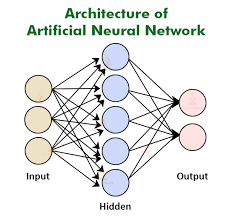

In [5]:
from IPython import display
display.Image("./ANN forward feed.png")

Artifical Neural Networks is the most common form of neural network which are used within machine learning in which there are several different forms it can take such as CNN, RNN, LSTM, Perception, etc. In which they can be forward propagation, backwards propagations can be used to determine how effective a model is predicting a output, in which this is down by updating the weights to reduce the error between the output and the expected output from a known target. For this analysis of digital images we are going to use torch linear function and ReLU function to determine how effective SNN model is when compared to this.

The two main functions that are used within these neural networks are nn.Linear and nn.ReLU and these can be described in the following:

<h1 align="center">6. $y = x A^T + b$</h1> [6]

<h1 align="center">7. $ReLU(x) = max(0,x)$</h1> [7]

Lastly we have the function which is used for forward propagation which is used to determine how much information is passed unto the next neuron.

<h1 align="center">8. $Y = X_1W_1+ X_2W_2 + ... + X_nW_n +b$</h1>

# ANN Model and Parameters

In [11]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(num_hidden, num_outputs)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out) # previously just out
        out = self.fc2(out)
        return out

In [12]:
def ANN(train_loader, test_loader, model, criterion, optimizer):
    start_time = time.time()

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
        
            outputs = model(images)
            loss = criterion(outputs, labels)
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1} \t Loss: {round(loss.item(),5)} \t time: {round(time.time()-start_time,2)}")

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        return('Accuracy of test images: {} %'.format(100 * correct / total))

## MNIST SNN Training and Testing

In [13]:
# Network Architecture
num_inputs = 28*28 # Sets the input to the size of the tensor. This should be equal to what we have resized the transform to.
num_hidden = 1000 # This can be abbriatory this is used to determine how many neurons should be used to analysis the data as hidden layer.
num_outputs = 10 # This is the output layer and this should be the number outcomes your expecting. As the number between 0 and 9.
num_epochs = 100

# Temporal Dynamics
num_steps = 100 # Think this is how long it takes to analysis any particular image? not sure yet.
beta = 0.95 # Decay rate the higher the number the slower the delay.

# Model Parameters
net_MNIST = Net().to(device)
loss = nn.CrossEntropyLoss()
optimizer_MNIST = torch.optim.Adam(net_MNIST.parameters(), lr=5e-4, betas=(0.9, 0.999))

In [14]:
# Outer training loop
counter = 0
start_time = time.time()

for epoch in range(num_epochs):
    train_batch = iter(MNIST_train_loader)

    # Minibatch training loop
    for data, targets in train_batch:
        data = data.to(device)
        targets = targets.to(device)

        # forward pass
        net_MNIST.train()
        spk_rec, _ = net_MNIST(data)

        # initialize the loss & sum over time
        loss_val = loss(spk_rec.sum(0), targets) # batch x num_out

        # Gradient calculation + weight update
        optimizer_MNIST.zero_grad()
        loss_val.backward()
        optimizer_MNIST.step()

        # Print train/test loss/accuracy
    if (epoch+1) % 10 == 0:
        print(f"epoch: {epoch+1} \t Loss: {round(loss_val.item(),5)} \t time: {round(time.time()-start_time,2)}")

print(f"Test set accuracy: {measure_accuracy(net_MNIST, MNIST_test_loader)}")

epoch: 10 	 Loss: 0.04902 	 time: 1080.03
epoch: 20 	 Loss: 0.00057 	 time: 2139.63
epoch: 30 	 Loss: 0.15646 	 time: 3202.63
epoch: 40 	 Loss: 0.00061 	 time: 4262.36
epoch: 50 	 Loss: 1e-05 	 time: 5312.38
epoch: 60 	 Loss: 0.11719 	 time: 6370.34
epoch: 70 	 Loss: 0.15626 	 time: 7429.79
epoch: 80 	 Loss: 0.0 	 time: 8513.12
epoch: 90 	 Loss: 0.00053 	 time: 9574.52
epoch: 100 	 Loss: 1e-05 	 time: 10632.38
Test set accuracy: 98.09695434570312


## MNIST ANN Training and Testing

In [15]:
# Network Architecture
num_inputs = 28*28 # Sets the input to the size of the tensor. This should be equal to what we have resized the transform to.
num_hidden = 1000 # This can be abbriatory this is used to determine how many neurons should be used to analysis the data as hidden layer.
num_outputs = 10 # This is the output layer and this should be the number outcomes your expecting. As the number between 0 and 9.

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FeedForwardNN(num_inputs, num_hidden, num_outputs).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=5e-4)

In [16]:
ANN(MNIST_train_loader, MNIST_test_loader, model, criterion, optimizer)

Epoch 10 	 Loss: 1.5685 	 time: 119.41
Epoch 20 	 Loss: 0.86026 	 time: 239.3
Epoch 30 	 Loss: 0.6587 	 time: 358.75
Epoch 40 	 Loss: 0.61247 	 time: 478.78
Epoch 50 	 Loss: 0.49148 	 time: 598.62
Epoch 60 	 Loss: 0.47183 	 time: 719.72
Epoch 70 	 Loss: 0.4611 	 time: 839.28
Epoch 80 	 Loss: 0.45465 	 time: 959.09
Epoch 90 	 Loss: 0.34067 	 time: 1078.87
Epoch 100 	 Loss: 0.37432 	 time: 1198.43


'Accuracy of test images: 90.22435897435898 %'

Upon comparing the output from both the above segments of code for how ANN compared to SNN we can see that the SNN model takes significantly longer to train with the average epoch training time being about ~1:50 mins when this is compared to ANN it takes ~12 seconds to train thus the ANN can run about 9 times more epoch in any given period of time. When looking at the accuracy of SSN and ANN model we obtain there accuarcy as 98.1% and 90.2% respectively which indicates that both model have a high degree of accuarcy at determine which handwritten number, in which SNN model performs slightly better in this aspect of the analysis.

# CIFAR 10 and 100

For this we can't determine how well this model works when just training this on one data set so for this we will try training both the ANN and SNN models on the CIFAR 10 and 100 data sets for which there are 10 and 100 classes respectively. For this we will determine wether the SNN model holds up well just for MNIST dataset which it was shown to be used in the SNN tutorial or wether this model will be generalised well. [8] [9] [10]

## CIFAR 10 SNN Training and Testing

In [17]:
# Network Architecture
num_inputs = 28*28 # Sets the input to the size of the tensor. This should be equal to what we have resized the transform to.
num_hidden = 1000 # This can be abbriatory this is used to determine how many neurons should be used to analysis the data as hidden layer.
num_outputs = 10 # This is the output layer and this should be the number outcomes your expecting. As the number between 0 and 9.
num_epochs = 100

# Temporal Dynamics
num_steps = 100 # Think this is how long it takes to analysis any particular image? not sure yet.
beta = 0.95 # Decay rate the higher the number the slower the delay.

# Model Parameters
loss = nn.CrossEntropyLoss()
net_CIFAR_10 = Net().to(device)
optimizer_CIFAR_10 = torch.optim.Adam(net_CIFAR_10.parameters(), lr=5e-4, betas=(0.9, 0.999))

In [19]:
counter = 0
start_time = time.time()

# Outer training loop
for epoch in range(num_epochs):
    train_batch = iter(CIFAR_10_train_loader)

    # Minibatch training loop
    for data, targets in train_batch:
        data = data.to(device)
        targets = targets.to(device)

        # forward pass
        net_CIFAR_10.train()
        spk_rec, _ = net_CIFAR_10(data)

        # initialize the loss & sum over time
        loss_val = loss(spk_rec.sum(0), targets) # batch x num_out

        # Gradient calculation + weight update
        optimizer_CIFAR_10.zero_grad()
        loss_val.backward()
        optimizer_CIFAR_10.step()

        # Print train/test loss/accuracy
    if (epoch+1) % 10 == 0:
        print(f"Epoch: {epoch+1} \t Loss: {round(loss_val.item(), 5)}\t time: {round(time.time()-start_time,2)}")

print(f"Test set accuracy: {measure_accuracy(net_CIFAR_10, CIFAR_10_test_loader)}")

Epoch: 10 	 Loss: 2.30258	 time: 891.53
Epoch: 20 	 Loss: 2.30258	 time: 1782.4
Epoch: 30 	 Loss: 2.30258	 time: 2663.47
Epoch: 40 	 Loss: 2.30258	 time: 3544.01
Epoch: 50 	 Loss: 2.30258	 time: 4425.32
Epoch: 60 	 Loss: 2.30258	 time: 5305.95
Epoch: 70 	 Loss: 2.30258	 time: 6187.04
Epoch: 80 	 Loss: 2.30258	 time: 7064.22
Epoch: 90 	 Loss: 2.30258	 time: 7941.83
Epoch: 100 	 Loss: 2.30258	 time: 8822.97
Test set accuracy: 9.985977172851562


## CIFAR 10 ANN Training and Testing

In [20]:
# Model Parameter:
num_inputs = 28*28 # Sets the input to the size of the tensor. This should be equal to what we have resized the transform to.
num_hidden = 1000 # This can be abbriatory this is used to determine how many neurons should be used to analysis the data as hidden layer.
num_outputs = 10 # This is the output layer and this should be the number outcomes your expecting. As the number between 0 and 9.

# Set up model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FeedForwardNN(num_inputs, num_hidden, num_outputs).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=5e-4)

ANN(CIFAR_10_train_loader, CIFAR_10_test_loader, model, criterion, optimizer)

Epoch 10 	 Loss: 2.19471 	 time: 109.38
Epoch 20 	 Loss: 2.12914 	 time: 218.15
Epoch 30 	 Loss: 2.03297 	 time: 326.96
Epoch 40 	 Loss: 2.1147 	 time: 435.87
Epoch 50 	 Loss: 2.09784 	 time: 544.47
Epoch 60 	 Loss: 2.06129 	 time: 653.05
Epoch 70 	 Loss: 2.04446 	 time: 762.42
Epoch 80 	 Loss: 1.97595 	 time: 871.14
Epoch 90 	 Loss: 2.06036 	 time: 979.4
Epoch 100 	 Loss: 2.05356 	 time: 1088.9


'Accuracy of test images: 29.01642628205128 %'

What can be obeserved from the training and testing of the CIFAR 10 model for both ANN and SNN is that the ANN model has a accuary of about ~30% and the SNN model has a accuary of about 10%. The 10% accuary of the SNN model indicates to us that this is no better than average chance at guessing which one of the catergories is correct. When compared to the ANN model which indicates a higher level of accuary with about a ~30% chance shows us that the SNN model is lacking in the ability to pick out images properly catergories them. With the low accuary within these model we have potential parameter's that could be improved upon within both model to but shows that at least in this example ANN model performed better in this analysis. 

## CIFAR 100 SNN Training and Testing

In [21]:
# Network Architecture
num_inputs = 28*28 # Sets the input to the size of the tensor. This should be equal to what we have resized the transform to.
num_hidden = 1000 # This can be abbriatory this is used to determine how many neurons should be used to analysis the data as hidden layer.
num_outputs = 100 # This is the output layer and this should be the number outcomes your expecting. As the number between 0 and 9.
num_epochs = 100

# Temporal Dynamics
num_steps = 100 # Think this is how long it takes to analysis any particular image? not sure yet.
beta = 0.95 # Decay rate the higher the number the slower the delay.

# Model Parameters
loss = nn.CrossEntropyLoss()
net_CIFAR_100 = Net().to(device)
optimizer_CIFAR_100 = torch.optim.Adam(net_CIFAR_100.parameters(), lr=5e-4, betas=(0.9, 0.999))

In [22]:
counter = 0
start_time = time.time()

# Outer training loop
for epoch in range(num_epochs):
    train_batch = iter(CIFAR_100_train_loader)

    # Minibatch training loop
    for data, targets in train_batch:
        data = data.to(device)
        targets = targets.to(device)

        # forward pass
        net_CIFAR_100.train()
        spk_rec, _ = net_CIFAR_100(data)

        # initialize the loss & sum over time
        loss_val = loss(spk_rec.sum(0), targets) # batch x num_out

        # Gradient calculation + weight update
        optimizer_CIFAR_100.zero_grad()
        loss_val.backward()
        optimizer_CIFAR_100.step()

        # Print train/test loss/accuracy
    if (epoch+1) % 10 == 0:
        print(f"Epoch: {epoch+1} \t Loss: {round(loss_val.item(), 5)}\t time: {round(time.time()-start_time,2)}")

print(f"Test set accuracy: {measure_accuracy(net_CIFAR_100, CIFAR_100_test_loader)}")

Epoch: 10 	 Loss: 4.60517	 time: 878.24
Epoch: 20 	 Loss: 4.60517	 time: 1753.68
Epoch: 30 	 Loss: 4.60517	 time: 2631.81
Epoch: 40 	 Loss: 4.60517	 time: 3510.43
Epoch: 50 	 Loss: 4.60517	 time: 4390.55
Epoch: 60 	 Loss: 4.60517	 time: 5268.55
Epoch: 70 	 Loss: 4.60517	 time: 6147.93
Epoch: 80 	 Loss: 4.60517	 time: 7024.89
Epoch: 90 	 Loss: 4.60517	 time: 7901.12
Epoch: 100 	 Loss: 4.60517	 time: 8779.86
Test set accuracy: 1.0016026496887207


## CIFAR 100 ANN Training and Testing

In [23]:
# Model Parameter:
num_inputs = 28*28 # Sets the input to the size of the tensor. This should be equal to what we have resized the transform to.
num_hidden = 1000 # This can be abbriatory this is used to determine how many neurons should be used to analysis the data as hidden layer.
num_outputs = 100 # This is the output layer and this should be the number outcomes your expecting. As the number between 0 and 9.

# Set up model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FeedForwardNN(num_inputs, num_hidden, num_outputs).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=5e-4)

ANN(CIFAR_100_train_loader, CIFAR_100_test_loader, model, criterion, optimizer)

Epoch 10 	 Loss: 4.60098 	 time: 109.56
Epoch 20 	 Loss: 4.56574 	 time: 218.09
Epoch 30 	 Loss: 4.55371 	 time: 326.69
Epoch 40 	 Loss: 4.53086 	 time: 436.32
Epoch 50 	 Loss: 4.54501 	 time: 544.8
Epoch 60 	 Loss: 4.4648 	 time: 654.02
Epoch 70 	 Loss: 4.42858 	 time: 763.44
Epoch 80 	 Loss: 4.41391 	 time: 872.29
Epoch 90 	 Loss: 4.41302 	 time: 981.98
Epoch 100 	 Loss: 4.34853 	 time: 1090.62


'Accuracy of test images: 5.238381410256411 %'

When looking at the CIFAR100 data set we can see from the SNN model has a accuracy of approximately of ~1% and the ANN model produced a result of ~5%. This shows us that like with CIFAR10 that ~10% accucary that it is no better than random chance and when this is compared to ANN model which has a accuary of ~5% which shows us that it performs better than average chance and as stated earlier in the CIFAR10 understanding that these could be improved upon by improving the model parameters.

# What can be understood so far
Having looking at these data sets we can see that SNN do not perform well in the process of image recognition when in comparision to ANN. For each of the models for the SNN obtained results of 98.10%, 9.99% and 1.00% and when this is compared to the ANN networks of 90.22%, 29.02% and 5.24%. From what we can see is that for the first model MNIST data set where the SNN performed really well in which it can nearly identify all test samples correctly and when this is compared to ANN in which it was only able to successfully identify about 9/10 targets. When looking at the CIFAR 10 data set we can see that it only successfully identify 1/10 targets which is no better than random chance when this is compared to the ANN model in which can approximately identify 3/10 targets which shows that the ANN significantly outperformed the SNN model, lastly when looking at the CIFAR100 result we can see a similar result in which the SNN model was of like the CIFAR10 model and was no better than random chance but when this is compared to the ANN model which was only able to successfully identify 5/100 targets. 

When looking at how well the SNN models perform in comparision to the ANN models we can see that only for the MNIST data set perform better than the ANN model but from what can be gather from SNN torch seems to have made use of this dataset as a training model to help develop this library thus leading to a higher result than average result when compared to CIFAR10 and 100 results which would indicate to us that on average these model do not perform better than just guess. When this is compared to ANN which performed well in MNIST but for the CIFAR10 and 100 datasets was better the just a average guess. 

Thus as a result SNN models do not perform at the task of image recognition on the tested data and these models would require significant improvement to be able to perform well at this task. When this is compared to ANN model it performed better than average chance at success identifying the target. Another factor of less significance to take into account is the training time required to develop these models in which the SNN model in which the time step interval was set to 100 take on average of at least 8 times longer to train there respective model when compared to ANN models in which was greater than 2 1/2 hours to train when compared to about 20 mins to train the models for ANN. As a result it is not practical to implement these model into the task of image recognition of a better and more optermised ANN which in just this simple configuration has a better than guess chance at identify a image at least in the terms of digital images.

When looking at this we can only limit any conclusion that we can make to just digital images and not any other form of image recognition wether it be optical recognition or other form of recognition using images. Neither can we conclude how well it will perform in the task of machine translation, lingustic analysis, relationship extraction, autonomous driving. This also does not indicate how well these takes perform when backwards propagation is performed to adjusts it weight when training is performed. A advantage that could be seen is that with the ability to adjust how long the model has to train within the time steps it can enable the model to have a better ability at perform a task.

Lastly this is only using known test cases datasets which are commonly used to analysis machine learning model and how well it performs at task of digital image analysis is not known in the course of this analysis but if the test cases are indication it will likely not perform well.

# <h1 align="center"> Bibilography</h1>

1. Action potential - Wikipedia [Internet]. [cited 2024 Apr 26]. Available from: https://en.wikipedia.org/wiki/Action_potential
2. Frontiers | Exploring spiking neural networks: a comprehensive analysis of mathematical models and applications [Internet]. [cited 2024 Apr 26]. Available from: https://www.frontiersin.org/articles/10.3389/fncom.2023.1215824/full
3. Fang W, Yu Z, Chen Y, Masquelier T, Huang T, Tian Y. Incorporating Learnable Membrane Time Constant to Enhance Learning of Spiking Neural Networks [Internet]. arXiv; 2021 [cited 2024 Apr 26]. Available from: http://arxiv.org/abs/2007.05785
4. snntorch — snntorch 0.9.1 documentation [Internet]. [cited 2024 Apr 26]. Available from: https://snntorch.readthedocs.io/en/latest/snntorch.html
5. snn.Leaky — snntorch 0.9.1 documentation [Internet]. [cited 2024 Apr 26]. Available from: https://snntorch.readthedocs.io/en/latest/snn.neurons_leaky.html
6. Linear — PyTorch 2.3 documentation [Internet]. [cited 2024 Apr 26]. Available from: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
7. ReLU — PyTorch 2.3 documentation [Internet]. [cited 2024 Apr 26]. Available from: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU
8. CIFAR-10 and CIFAR-100 datasets [Internet]. [cited 2024 Apr 26]. Available from: https://www.cs.toronto.edu/~kriz/cifar.html
9. CIFAR10 — Torchvision main documentation [Internet]. [cited 2024 Apr 26]. Available from: https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10
10. CIFAR100 — Torchvision main documentation [Internet]. [cited 2024 Apr 26]. Available from: https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR100.html#torchvision.datasets.CIFAR100
